<a href="https://colab.research.google.com/github/Abeer-Rahman/Deep-Learning-With-Python/blob/main/Copy_of_chapter02_mathematical_building_blocks_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network
In deep learning layered representations are learned via neural networks.The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9)

To achieve this we will go throght following steps:
1.Load the MNIST dataset in Keras
2.Build the network architecture
3,The compilation step
4.Preparing the image data
5.“Fitting” the model
6.Using the model to make predictions
7.Evaluating the model on new data

MNIST dataset is preloaded in Keras in the form of a 4 sets of Numpy arrays

**Tensorflow**:
1. An open source platform developed by google for ML and DL
2. It provides a comprehensive, flexible ecosystem of tools, libraries
3. Supports various ML and DL algorithms and models

4. Being open-source allows anyone to use and contribute to TensorFlow's development. It also supports various programming languages like Python, C++, and JavaScript, offering flexibility for developers.

**Keras**:

1. Keras is a high-level neural networks API(Application programe Interface, written in Python.API is like a handshaking protocol between two different software programmes to communicate with each other so that they can exchange data and functionality

 Analogy(Acts as a middleman):Imagine you're at a restaurant. You (the user) tell the waiter (the API) what you want (your request). The waiter relays that message to the kitchen (the other program), which then prepares your food (performs the action). Finally, the waiter brings you your food (the response).

 Example:Uber(Gemini)

2. Back to Keras: Keras can use libraries like TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML as its backend to perform the actual computations needed for training and running neural networks

3. Keras as a Frontend:Keras is a high-level API that simplifies building and training neural networks. When you write Keras code, you define the architecture of your neural network and specify how it should be trained, but you don't handle the low-level computations yourself. Instead, Keras translates your model and operations into backend-specific code.

**Dataset**:

A dataset refers to a collection of data instances which are used for training machine learning models. Datasets are typically split into training, validation, and test sets. TensorFlow provides various tools and libraries to work with datasets

data instances (also referred to as samples, examples, or records) are individual pieces of data that are part of a dataset. Each data instance typically consists of multiple attributes (features) and may include a label (target value) if it is part of a supervised learning problem.



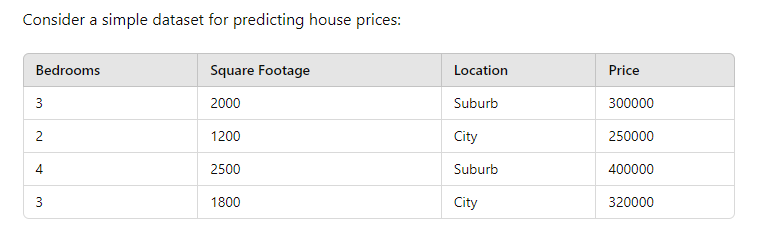

Data Instances: Each row (record) in this table is a data instance. For example, the first row represents a house with 3 bedrooms, 2000 square feet, located in a suburb, priced at 300,000.

Features: Bedrooms, Square Footage, Location.

Label: Price.


**MNIST Database**: (Modified National Institute of Standards and Technology) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST dataset contains 60,000 training images and 10,000 testing images, each of which is a 28x28 pixel grayscale image of a handwritten digit (0-9). It's a popular dataset for testing and comparing different machine learning algorithms.


**Loading the MNIST dataset in Keras**

In [ ]:
#imports 'mnist' module from tensorflow.keras.datasets.
#The mnist module provides function to load the MNIST dataset.
from tensorflow.keras.datasets import mnist
# loads the MNIST dataset and returns two tuples
#elments of each tuple are Numpy arrays
#train_images and train_labels form the training set, the data that the model will learn from.
# The model will then be tested on the test set, test_images and test_label
#print(type(mnist))
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
for i in [train_images,train_labels,test_images,test_labels]:
  print(type(i))

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
train_images.shape
#6000 refers to numbers of images,28 is pixel height and weight

(60000, 28, 28)

In [ ]:
#self:for understanding dimension in shape
import numpy as np

arr = np.array([1, 2, 3, 4], ndmin=5)

print(arr)
print('shape of array :', arr.shape)

[[[[[1 2 3 4]]]]]
shape of array : (1, 1, 1, 1, 4)


In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels.shape
#retrns the singleton tuple,dimension of array

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#The network architecture

**Book**:

The core building block of neural networks is the layer.Building network architecture means to make model by adding layers. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form. Specifically, layers extract representations out of the data fed into them—hopefully, representations that are more meaningful for the problem at hand.

**Gemini:**

##import the core Keras module from TensorFlow.
`from tensorflow import keras`
##import the layers submodule from Keras,
from tensorflow.keras import layers
##with these layers we will build our model

If we look at the schematic of the model then the output of one layer
will be the input of the next layer,so we need a linear stack of layers.
Sequential models are ideal for building models with a linear stack of layers.

```
model = keras.Sequential([

    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

```





##Now that we have decided our model,we need to add layers

1.model.add(layers.Dense(512, activation="relu"))adds the first
 layer to the model.


Dense layer: This is a fully-connected layer, meaning all neurons in the layer
are connected to all neurons in the previous layer.

512 units: This specifies the number of neurons in the layer.
Each neuron processes a portion of the data and contributes to the layer's output.

"relu" activation: This defines the activation function applied to the output of
 each neuron. The "relu" (rectified linear unit) function introduces non-linearity
 into the model, allowing it to learn complex patterns.

2.model.add(layers.Dense(10, activation="softmax")): This line adds the second
 (and final) layer to the model. It's also a Dense layer, but with 10 units and
 uses the "softmax" activation function.

The second (and last) layer is a 10-way softmax classification layer, which means
it will return an array of 10 probability scores (summing to 1). Each score will
be the probability that the current digit image belongs to one of our
10 digit classes

Overall, this code defines a simple neural network with two hidden layers. The
first layer with 512 units could be considered a feature extractor, transforming
the input data into a higher-dimensional representation. The second layer with
10 units and the softmax activation suggests the model is intended for
a classification task with 10 possible classes.

**Activation function**

A crucial component in artificial neural networks, responsible for introducing non-linearity into the model.

This non-linearity enables the network to learn and model complex relationships in the data, going beyond simple linear transformations. Here's a detailed look at activation functions:

Why Use Activation Functions?

Introduce Non-linearity: Activation functions enable the network to capture complex patterns by introducing non-linear transformations.

Control Output: They control the output range of neurons, which can be beneficial for certain types of layers (e.g., softmax for probabilistic outputs).


Backpropagation: They provide gradients needed for the backpropagation algorithm, allowing the network to learn via gradient descent.

Choosing the Right Activation Function
The choice of activation function can significantly impact the performance of a neural network. Here are some guidelines:

Hidden Layers: ReLU and its variants (Leaky ReLU, PReLU, ELU) are commonly used due to their efficiency and ability to mitigate the vanishing gradient problem.

Output Layer:

-Binary Classification: Sigmoid

-Multi-class Classification: Softmax

-Regression: Linear activation (or no activation)







In [ ]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([

    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

#The compilation step

To make the model ready for training, we need to pick three more things as part of the compilation step:

1. An optimizer—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.

2. A loss function—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.

3. Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).


**Breaking down code:**

```
model.compile(...)
```

compile method configures the model for training by specifying several parameters.

1. optimizer="rmsprop":

This sets the optimization algorithm used to update the model's internal weights during training. In this case, the optimizer is "rmsprop," which is a variant of stochastic gradient descent (SGD) that can improve upon the convergence of SGD in some cases.


This specifies the optimizer to be used during training. RMSprop (Root Mean Square Propagation) is an adaptive learning rate method that adjusts the learning rate based on the average of recent magnitudes of the gradients for the weights.


SGD: It's a widely used optimization algorithm in machine learning, particularly for training models like neural networks.It is an iterative method for minimizing an objective function, which is typically the loss function in the context of neural networks.

Here's a breakdown of how it works:

In the context of machine learning and optimization, a gradient is a vector that represents the direction and rate of fastest increase of a scalar function. The concept is central to the training of models using algorithms like gradient descent.

**Mathematical Definition**:
For a scalar function $f(\mathbf{x})$ where
x is a vector of variables, the gradient is a vector of partial derivatives of  f with respect to each variable in x

if $\mathbf{x}$=($x_{1}$,$x_{2}$,$x_{3}$,....,$x_{n}$), then the gradient of $f$ is given by:

$\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n} \right)$

Each component of the gradient vector indicates the rate of change of the function with respect to one of the variables.

**Gradient in Machine Learning**:

In the context of machine learning, gradients are used to minimize the loss function during the training of models. The loss function
$L(\theta)$ measures how well the model's predictions match the actual target values, and $\theta$ represents the model's parameters.

The goal of training is to find the parameter values that minimize the loss function. This is typically done using optimization algorithms like gradient descent, which rely on the gradient of the loss function with respect to the parameters. The gradient indicates how to change the parameters to reduce the loss function.

**Gradient Descent**:

Gradient descent is an iterative optimization algorithm used to minimize a function

At each iteration, the algorithm updates the parameters in the direction opposite to the gradient of the loss function.

This is because the gradient points in the direction of the steepest increase, so moving in the opposite direction reduces the function value.

The parameter update rule for gradient descent is:

$\theta_{t+1} = \theta_t - \eta \nabla_{\theta} L(\theta_t)$

where,
$\theta_{t}$ =  parameters at iteration t

$\eta$= learning rate, a small positive number that controls the step size of the update

$\nabla_{θ}L(\theta_{t})$ =  gradient of the loss function with respect to the parameters at iteration t

**Stochastic Gradient Descent (SGD)**:

In contrast to standard gradient descent, which computes the gradient using the entire dataset, SGD updates the parameters for each training example one at a time. This introduces noise into the optimization process, which can help escape local minima and find better overall solutions.

The update rule for SGD is:


$\theta_{t+1} = \theta_t - \eta \nabla_{\theta} L(\theta_t;x_{i},y_{i})$

$(x_{i},y_{i})$ is a single training example






In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

#**Preparing the image data**
we’ll preprocess the data by reshaping it into the shape the model expects and scaling it so that all values are in the [0, 1] interval

our training images were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval.

The images are initially in a 3D array of shape **(num_images, height, width)**

Reshape each image into a 1D array of size 784 (28*28), whcih results in 2D array of shape ** (num_images,784)**



In [ ]:
# reshaping each image
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(train_images.shape)
#Normalizing the pixel values
train_images = train_images.astype("float32") / 255
# print(train_images)
# print(train_images.shape)
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(60000, 784)


#July 25,2024

**"Fitting" the model**

In [ ]:
#fit method used to train the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)


"""
epochs=5: no. of times the model will iterate over the entire training dataset
batch size=128:no. of samples per gradient update, model will process 128 samples before updating the model's parameters
#quantities displayed: loss of the model over the training and accuracy
"""

Epoch 1/5
469/469 [==============================] - 8s 8ms/step - loss: 0.2667 - accuracy: 0.9227
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1087 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0708 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0521 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0391 - accuracy: 0.9882


"\nepochs=5: no. of times the model will iterate over the entire training dataset\nbatch size=128:no. of samples per gradient update, model will process 128 samples before updating the model's parameters\n#quantities displayed: loss of the model over the training and accuracy\n"

**Using the model to make predictions**

Model has been trained with  98.91% accuracy. Now we can it to predict class probabilities for new digits(images not part of training data)


In [ ]:
test_digits = test_images[0:10]
# print(type(test_digits))
# print(test_digits)
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 71ms/step


array([7.0398158e-08, 3.1678410e-10, 5.5741066e-06, 9.8607517e-05,
       1.9816375e-12, 4.2572108e-08, 2.1058806e-12, 9.9989533e-01,
       4.1608136e-08, 3.6794086e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99989533

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

computing average accuracy over the entire test set

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9786
test_acc: 0.978600025177002


The training accuracy is 0.99 and test accuracy is 0.97. The gap between these two are called overfitting

## Data representations for neural networks

* Data stored in multi-dimensional Numpy array(also known as tensor)
* Tensor is a generalization of matrices with n-dim(axis)



### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x
print(x)

12


In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)
A tensor of rank 5 is a tensor with 5 axes
Dimention:no. of entries along each axis

In [ ]:
x = np.array([12, 3, 6, 14, 7])
#x is a 5D vector but is a tensor with rank 1
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)



*   A tensor with 2 axes:row and column




In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim
print(len(x.shape))

2


### Rank-3 and higher-rank tensors
It's like stacking a matrix in 3 layers

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
#The numpy array has three layers and each layer has 3 rows and 5 columns
print(x.ndim)
print(x.shape) # (layer,row,column)
print(len(x.shape))
#accessing element [layer,row,colum],indexing starts with 0
print(x[1,2,1])
print(x.size) # layer x row x column

3
(3, 3, 5)
3
80
45


### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim
#rank-3 tensor

3

In [ ]:
train_images.shape
#60000 matrices of 28x28 integers (each has 28 rows and 28 columns)

(60000, 28, 28)

In [ ]:
train_images.dtype
#Each such matrix is a grayscale image, with coefficients between 0 and 255.

dtype('uint8')

**Displaying the fourth digit**

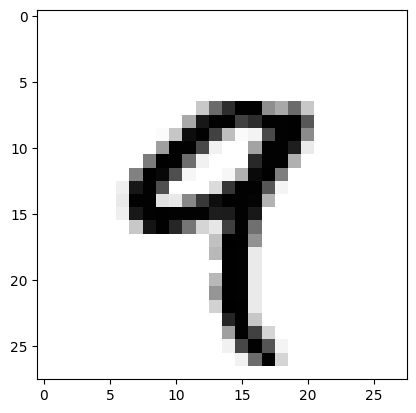

In [ ]:
import matplotlib.pyplot as plt
# print(train_images.shape)
digit = train_images[4]
# print(digit)
#Each axis contains a digit, the matrix in the corresponding
#axis is the grayscale of that digit
plt.imshow(digit, cmap=plt.cm.binary)
#colormap renders the image in black and white
plt.show()

In [ ]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
#select 90 digits and put them in an array
#slicing along tensor axis all taking the whole matrix along that axis
my_slice.shape

(90, 28, 28)

In [ ]:
#Equivalent to the previous
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
#Equivalent to the previous
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
#Slicing pixels
my_slice = train_images[:, 14:, 14:]

In [ ]:
#slicing using negative index
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

Instead of processing the entire data set at once, break it into small batches



In [ ]:
batch = train_images[:128]


In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

Data will typically fall into following category:

1.Vector Data:Rank-2 tensor(samples,feature);each sample is a vector of numerical attributes (“features”)

2.Timeseries data or sequence data:Rank-3 tensor(samples, timesteps, features);each sample is a sequence of feature vectors

3.Images: Rank-4 tensors(samples, height, width, channels); each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)

4.Video: Rank-5 tensors (samples, frames, height, width, channels);each sample is a sequence of images

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2 # x is a rank-2 tensor,vector data,(row,column),x.ndim
    x = x.copy() #avoids overwriting the input x
    for i in range(x.shape[0]): # x.shape[0]=# of rows
        for j in range(x.shape[1]):  # x.shape[1]=# of col
            x[i, j] = max(x[i, j], 0)
    return x # reutn zero for negative entries

In [ ]:
# testing the naive_relu function with a rank-2 Tensor
import numpy as np
p = np.array([[5, 78, 2, 34, 0],
              [6, 79, -4, 35, 1],
              [7, -8, 4, 36, 2]])
print(p.ndim)
print(p.shape[0])
print(len(p.shape))
relu=naive_relu(p)
print(relu)
print(relu.ndim)
print(relu.shape[0])
print(relu)

2
3
2
[[ 5 78  2 34  0]
 [ 6 79  0 35  1]
 [ 7  0  4 36  2]]
2
3
[[ 5 78  2 34  0]
 [ 6 79  0 35  1]
 [ 7  0  4 36  2]]


In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j] #changing the elements of x
    return x

In [ ]:
#same thing but implemented with basic linear algebra subprogram
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
print(type(x))
print(x.shape)
print(y.shape)
t0 = time.time()
print(type(t0))
print(t0)

for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

<class 'numpy.ndarray'>
(20, 100)
(20, 100)
<class 'float'>
1719265828.755673
Took: 0.01 s


### Broadcasting
When the dimension of the tensors do not match, broadcast the smaller one to the larger one


In [ ]:
import numpy as np
X = np.random.random((32, 10)) # A matrix with shape(32,10)
y = np.random.random((10,))  # A vector with shape(10,)
print(X)
print(y)
print(X.shape)
print(y.shape)
#print(X+y)

[[0.34293189 0.42106678 0.88124909 0.95907207 0.36844477 0.78113127
  0.44365    0.96358136 0.04680296 0.77856411]
 [0.21205291 0.63529332 0.98307784 0.53195357 0.76823694 0.73910373
  0.76698179 0.16151955 0.1202254  0.4775319 ]
 [0.17818162 0.34604909 0.92175215 0.03239149 0.34603549 0.98394874
  0.25353842 0.02921829 0.5401548  0.56606877]
 [0.56180848 0.16243105 0.2889002  0.57634209 0.8033066  0.72228775
  0.59024126 0.62549313 0.81573016 0.0644092 ]
 [0.55072744 0.1954428  0.58098205 0.82649526 0.51911415 0.46742773
  0.03404158 0.77596773 0.39908367 0.18411511]
 [0.02640247 0.56963032 0.85482539 0.55230514 0.61004783 0.12826777
  0.14442922 0.91603411 0.97931932 0.21649985]
 [0.50735164 0.82100298 0.89938255 0.34155523 0.55621242 0.80000879
  0.20971864 0.11598025 0.71746665 0.74830067]
 [0.17429403 0.45745656 0.52108744 0.06765324 0.42404022 0.13688295
  0.08707692 0.68497559 0.87646019 0.5368739 ]
 [0.47210922 0.65778162 0.2152368  0.32201344 0.79158169 0.01832796
  0.6724799 

# Understanding shape of vector


In [ ]:
a=np.array([1,2,3])
print(a)
print(a.shape)
b=np.array([[1,2,3]])
print(b)
print(b.shape)
c=np.array([[1],[2],[3]])
print(c)
print(c.shape)

[1 2 3]
(3,)
[[1 2 3]]
(1, 3)
[[1]
 [2]
 [3]]
(3, 1)


In [ ]:
#add empty 1st axis to y at 0 position
y = np.expand_dims(y, axis=0) #shape becomes (1,10)
print(y)
print(y.shape)

[[0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]]
(1, 10)


# Understanding how concatenate method works

In [ ]:

A=np.array([[1,2],[3,4]])
B=np.array([[5,6],[7,8]])

#A and B are rank-2 tensors,so they both have 2 axes
#axis=0 is row,axis=1 is col
print(A.shape)
print(B.shape)


(2, 2)
(2, 2)


Concatinating along row (axis=0) should look like this  mathematically

$$
\begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 \\
7 &  8
\end{bmatrix}
$$

So the shape will be (4,2)


In [ ]:
C=np.concatenate((A,B),axis=0)
print(C)
print(C.shape)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
(4, 2)


Concatinating along column (axis=1) should look like this  mathematically

$$
\begin{bmatrix}
1 & 2 & 5 & 6  \\
3 & 4 &7 &8
\end{bmatrix}
$$

So the shape will be (2,4)

In [ ]:
D=np.concatenate((A,B),axis=1)
print(D)
print(D.shape)

[[1 2 5 6]
 [3 4 7 8]]
(2, 4)


#Continue...

In [ ]:
Y = np.concatenate([y] * 32, axis=0) #repeat y 32 times along new axis
#shape of y is (1,10), we have to make to (32,10)
print(Y)
print(Y.shape)
#now we can add
output=X+Y
print(output.shape)

[[0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252  0.70596226 0.3019593  0.26182493]
 [0.9420736  0.93606453 0.97449383 0.8957882  0.39800364 0.16621083
  0.1678252 

#implementing the above thing from scratch


In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
A=np.random.random((2,3))
print(A)
B=np.random.random((3))
print(B)
print(A+B)
C=naive_add_matrix_and_vector(A,B)
print(C)
print(A.shape,B.shape,C.shape)

[[0.61752281 0.98564994 0.69844893]
 [0.21593433 0.52806516 0.45152634]]
[0.41522298 0.31790394 0.89089427]
[[1.03274579 1.30355388 1.5893432 ]
 [0.63115731 0.8459691  1.34242061]]
[[1.03274579 1.30355388 1.5893432 ]
 [0.63115731 0.8459691  1.34242061]]
(2, 3) (3,) (2, 3)


# Understanding braodacasting(self)

In [ ]:
A=np.random.random((2,3))
print("A=",A)
B=np.random.random((3,))
print("B=",B)

print("A+B=",A+B)
C=np.random.random((1,3))
print("C=",C)
print("A+C=", A+C)

D=np.random.random((4,))
try:
  print(A+D)
except:
  print ("A+D is not possible")

A= [[0.44276154 0.11086244 0.67178744]
 [0.26466397 0.6971117  0.85467665]]
B= [0.47254343 0.18657992 0.30797894]
A+B= [[0.91530497 0.29744237 0.97976638]
 [0.73720741 0.88369162 1.16265559]]
C= [[0.98043509 0.42883548 0.48934183]]
A+C= [[1.42319663 0.53969793 1.16112928]
 [1.24509906 1.12594718 1.34401849]]
A+D is not possible


# Continue

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(z.shape)
# y = np.random.random((10))


(64, 3, 32, 10)


### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
print(z)
print(z.shape)
print(type(z))

10.247713453330181
()
<class 'numpy.float64'>


In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
x=np.array([1,2,3])
y=np.array([4,5,6])
z=naive_vector_dot(x,y)
print(z)



32.0


In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
#Dot product between a matrix and a vector(row-wise)

a=np.array([[1,2,3],[4,5,6]])
print('a=',a)
print('b=',b)
b=np.array([1,2,3])
c=np.dot(a,b)
print('c=',c)
print(np.shape(a))
print(np.shape(b))
print(np.shape(c))

#Dot product between two compatible matrices
mat_a=np.array([[1,2,3],[4,5,6]])
print(mat_a)

mat_b=np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(mat_b)

print(np.dot(mat_a,mat_b))


a= [[1 2 3]
 [4 5 6]]
b= [[1 2 3]]
c= [14 32]
(2, 3)
(3,)
(2,)
[[1 2 3]
 [4 5 6]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 38  44  50  56]
 [ 83  98 113 128]]


In [ ]:
z=np.zeros(2)
print(z)

[0. 0.]


In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z


In [ ]:
print(naive_matrix_vector_dot(a,b))


[14. 32.]


In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2  #x and y are Numpy matrices
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

In [ ]:
a=np.random.random((2,3))
b=np.random.random((3,4))
mat_mult=naive_matrix_dot(a,b)
print(mat_mult)
print(mat_mult.shape)

[[0.77104749 0.56895225 0.15162422 0.67238468]
 [0.82465146 0.27478446 0.58899834 0.50050059]]
(2, 4)


### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.) #A tensor to hold mutable  state(weights),intialized with 0
# print(x)
# print(x.shape)
with tf.GradientTape() as tape: # GradientTape works with tensor operations
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x) # retrive the gradient y with respect to x
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
print(x)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.86879027, 0.00928855],
       [0.96839905, 0.3715328 ]], dtype=float32)>


In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
print(W)
b = tf.Variable(tf.zeros((2,)))
print(b)
x = tf.random.uniform((2, 2))
print(x)
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b #b has been broadcasted. column-wise addition to
    #the 2x2 matrix
print(y)
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
print(grad_of_y_wrt_W_and_b)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.09675097, 0.4910121 ],
       [0.3470751 , 0.9965428 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>
tf.Tensor(
[[0.9243605  0.20600975]
 [0.11467183 0.5572492 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.16093364 0.65916973]
 [0.20450194 0.6116279 ]], shape=(2, 2), dtype=float32)
[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.0390323 , 1.0390323 ],
       [0.76325893, 0.76325893]], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]


## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary